## Listening to the Data

In [1]:
# Pkg.add("StatsBase")
# Pkg.add("Gadfly")
# Pkg.add("HypothesisTests")

In [2]:
using StatsBase
using Gadfly
using HypothesisTests
using DataFrames

INFO: Recompiling stale cache file C:\Users\ChuKY\.julia\lib\v0.5\HypothesisTests.ji for module HypothesisTests.


In [3]:
X = readcsv("magic04.csv")

19021×11 Array{Any,2}:
  28.7967   16.0021  2.6449  0.3918  …   -8.2027  40.092    81.8828  "g"
  31.6036   11.7235  2.5185  0.5303      -9.9574   6.3609  205.261   "g"
 162.052   136.031   4.0612  0.0374     -45.216   76.96    256.788   "g"
  23.8172    9.5728  2.3385  0.6147      -7.1513  10.449   116.737   "g"
  75.1362   30.9205  3.1611  0.3168      21.8393   4.648   356.462   "g"
  51.624    21.1502  2.9085  0.242   …    9.8145   3.613   238.098   "g"
  48.2468   17.3565  3.0332  0.2529      10.5868   4.792   219.087   "g"
  26.7897   13.7595  2.5521  0.4236      -2.9292   0.812   237.134   "g"
  96.2327   46.5165  4.154   0.0779      43.1844   4.854   248.226   "g"
  46.7619   15.1993  2.5786  0.3377      -6.6812   7.875   102.251   "g"
  62.7766   29.9104  3.3331  0.2475  …   23.771    9.9144  323.094   "g"
  18.8562   16.46    2.4385  0.5282     -16.9327  11.461   162.848   "g"
  45.6321   22.71    3.0441  0.2213     -14.3164   0.3822  178.255   "g"
   ⋮                        

In [4]:
X = X[1:end-1, :]

19020×11 Array{Any,2}:
  28.7967   16.0021  2.6449  0.3918  …   -8.2027  40.092    81.8828  "g"
  31.6036   11.7235  2.5185  0.5303      -9.9574   6.3609  205.261   "g"
 162.052   136.031   4.0612  0.0374     -45.216   76.96    256.788   "g"
  23.8172    9.5728  2.3385  0.6147      -7.1513  10.449   116.737   "g"
  75.1362   30.9205  3.1611  0.3168      21.8393   4.648   356.462   "g"
  51.624    21.1502  2.9085  0.242   …    9.8145   3.613   238.098   "g"
  48.2468   17.3565  3.0332  0.2529      10.5868   4.792   219.087   "g"
  26.7897   13.7595  2.5521  0.4236      -2.9292   0.812   237.134   "g"
  96.2327   46.5165  4.154   0.0779      43.1844   4.854   248.226   "g"
  46.7619   15.1993  2.5786  0.3377      -6.6812   7.875   102.251   "g"
  62.7766   29.9104  3.3331  0.2475  …   23.771    9.9144  323.094   "g"
  18.8562   16.46    2.4385  0.5282     -16.9327  11.461   162.848   "g"
  45.6321   22.71    3.0441  0.2213     -14.3164   0.3822  178.255   "g"
   ⋮                        

In [5]:
# Preparing the data of magic for exploration
N, n = size(X)
I = Array(Float64, N, n-1)
O = X[:, end]
for j in 1:(n - 1)
    for i in 1:N
        I[i, j] = Float64(X[i, j])
    end
end

### Variable summary

In [6]:
# Apply describe() to each one of the input variables of magic:
for i in 1:size(I, 2)
    describe(I[:, i])
end

Summary Stats:
Mean:         53.250154
Minimum:      4.283500
1st Quartile: 24.336000
Median:       37.147700
3rd Quartile: 70.122175
Maximum:      334.177000
Summary Stats:
Mean:         22.180966
Minimum:      0.000000
1st Quartile: 11.863800
Median:       17.139900
3rd Quartile: 24.739475
Maximum:      256.382000
Summary Stats:
Mean:         2.825017
Minimum:      1.941300
1st Quartile: 2.477100
Median:       2.739600
3rd Quartile: 3.101600
Maximum:      5.323300
Summary Stats:
Mean:         0.380327
Minimum:      0.013100
1st Quartile: 0.235800
Median:       0.354150
3rd Quartile: 0.503700
Maximum:      0.893000
Summary Stats:
Mean:         0.214657
Minimum:      0.000300
1st Quartile: 0.128475
Median:       0.196500
3rd Quartile: 0.285225
Maximum:      0.675200
Summary Stats:
Mean:         -4.331745
Minimum:      -457.916100
1st Quartile: -20.586550
Median:       4.013050
3rd Quartile: 24.063700
Maximum:      575.240700
Summary Stats:
Mean:         10.545545
Minimum:      -331.780

In [7]:
println(skewness(I[:, 1]))    # skewness of the first column of magic dataset

2.0134935150809214


In [9]:
for i in 1:size(I, 2)
    println("skeness of column ", i, " is : ", skewness(I[:, i]))
end

skeness of column 1 is : 2.0134935150809214
skeness of column 2 is : 3.3713620736899794
skeness of column 3 is : 0.8754381230627409
skeness of column 4 is : 0.48585013377432057
skeness of column 5 is : 0.685640547808313
skeness of column 6 is : -1.0463589436901628
skeness of column 7 is : -1.1229894825198226
skeness of column 8 is : 0.12011179996396494
skeness of column 9 is : 0.8508227710257318
skeness of column 10 is : 0.2295692697348024


In [11]:
# using summarystats() for descriptive statistics
summarystats(I[:, 1]).mean

# methods for summarystats(); mean, min, q25, median, q75, max
println("The mean of the first column is :", summarystats(I[:, 1]).mean)
println("The mimimum of the first column is :", summarystats(I[:, 1]).min)
println("The 1st quartile of the first column is :", summarystats(I[:, 1]).q25)
println("The median of the first column is :", summarystats(I[:, 1]).median)
println("The 3rd quartile of the first column is :", summarystats(I[:, 1]).q75)
println("The maximum of the first column is :", summarystats(I[:, 1]).max)

# summarystats() works only on Array structures, so if you want to apply it on a DataArray,
# you will need to convert it to an array first using the following general command:
# convert(Array, DataFrameName[:VariableName])

The mean of the first column is :53.2501539274448
The mimimum of the first column is :4.2835
The 1st quartile of the first column is :24.336
The median of the first column is :37.1477
The 3rd quartile of the first column is :70.122175
The maximum of the first column is :334.177


### Correlations among variables

- cor(x, y) ; where x and y are arrays of the same dimensionality.

- cor(X) ; where X is the whole dataset(Array{T, 2}, where T <: Number).

In [12]:
C = cor(I)

10×10 Array{Float64,2}:
  1.0          0.770512    0.702454   -0.630999   …  -0.00877749   0.418466 
  0.770512     1.0         0.717517   -0.609779       0.0660614    0.336816 
  0.702454     0.717517    1.0        -0.85085       -0.186675     0.437041 
 -0.630999    -0.609779   -0.85085     1.0            0.235272    -0.328332 
 -0.598145    -0.581141   -0.808835    0.976412       0.229799    -0.304625 
 -0.368556    -0.266961   -0.159863    0.112272   …  -0.0556886   -0.20673  
 -0.119747    -0.176234    0.0951572  -0.121899      -0.186275     0.0370252
  0.0133892    0.0397436   0.0154547  -0.0112941      0.00465913   0.0114266
 -0.00877749   0.0660614  -0.186675    0.235272       1.0         -0.220556 
  0.418466     0.336816    0.437041   -0.328332      -0.220556     1.0      

## Plots

- Gladfly(Julia)
- Plotly(Python, JS, etc.)
- Bokeh(Python)
- Winston(Julia)
- Vega(Julia)

### Grammar of graphics

- Aesthetic mappings: Guide.
- Geometry: Geom.
- Statistical transformation
- Position adjustment: Scale.
- Data

### Preparing data for visualization

In [14]:
varnames = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans",
    "fAlpha", "fDist", "class"]

11-element Array{String,1}:
 "fLength" 
 "fWidth"  
 "fSize"   
 "fConc"   
 "fConcl"  
 "fAsym"   
 "fM3Long" 
 "fM3Trans"
 "fAlpha"  
 "fDist"   
 "class"   

In [17]:
df = readtable("magic04.csv", header = false)
df = df[1:end - 1, :]

old_names = names(df)
new_names = [Symbol(varnames[i]) for i in 1:length(varnames)]

for i in 1:length(old_names)
    rename!(df, old_names[i], new_names[i])
end

In [18]:
println(head(df))
println(tail(df))

6×11 DataFrames.DataFrame
│ Row │ fLength │ fWidth  │ fSize  │ fConc  │ fConcl │ fAsym   │ fM3Long │
├─────┼─────────┼─────────┼────────┼────────┼────────┼─────────┼─────────┤
│ 1   │ 28.7967 │ 16.0021 │ 2.6449 │ 0.3918 │ 0.1982 │ 27.7004 │ 22.011  │
│ 2   │ 31.6036 │ 11.7235 │ 2.5185 │ 0.5303 │ 0.3773 │ 26.2722 │ 23.8238 │
│ 3   │ 162.052 │ 136.031 │ 4.0612 │ 0.0374 │ 0.0187 │ 116.741 │ -64.858 │
│ 4   │ 23.8172 │ 9.5728  │ 2.3385 │ 0.6147 │ 0.3922 │ 27.2107 │ -6.4633 │
│ 5   │ 75.1362 │ 30.9205 │ 3.1611 │ 0.3168 │ 0.1832 │ -5.5277 │ 28.5525 │
│ 6   │ 51.624  │ 21.1502 │ 2.9085 │ 0.242  │ 0.134  │ 50.8761 │ 43.1887 │

│ Row │ fM3Trans │ fAlpha │ fDist   │ class │
├─────┼──────────┼────────┼─────────┼───────┤
│ 1   │ -8.2027  │ 40.092 │ 81.8828 │ "g"   │
│ 2   │ -9.9574  │ 6.3609 │ 205.261 │ "g"   │
│ 3   │ -45.216  │ 76.96  │ 256.788 │ "g"   │
│ 4   │ -7.1513  │ 10.449 │ 116.737 │ "g"   │
│ 5   │ 21.8393  │ 4.648  │ 356.462 │ "g"   │
│ 6   │ 9.8145   │ 3.613  │ 238.098 │ "g"   │
6×11 

### Box plots

### Bar plots

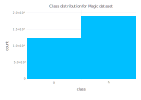

In [19]:
plot(df, x = "class", Geom.bar, Guide.ylabel("count"), Guide.title("Class distribution for Magic dataset"))

### Line plots

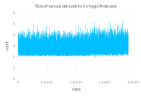

In [20]:
plot(df, y = "fSize", Geom.line, Guide.xlabel("class"), Guide.ylabel("count"), 
Guide.title("fSize of various data points in magic04 dataset"))

### Scatter plot

In [21]:
# Basic scatter plot
plot(x = df[:fM3Long], y = df[:fM3Trans], Geom.point, Guide.xlabel("fM3Long"), Guide.ylabel("fM3Trans"),
Guide.title("Relationship between fM3Trans & fM3Long"))